(a) Usando Simpy, declara las funciones:$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$
(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$
(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [2]:
%pylab inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt #cargamos paquetería necesaria para el cálculo simbólico y visualización

Populating the interactive namespace from numpy and matplotlib


a)

In [3]:
x,y,z,w,g=symbols('x,y,z,w,g') #definir los símbolos

In [4]:
y=Function('y')   #asignarlas como funciones
z=Function('z')
w=Function('w')
g=Function('g')

In [5]:
Eq(y(x),sin(x))

Eq(y(x), sin(x))

In [6]:
Eq(z(x),cos(x))

Eq(z(x), cos(x))

In [7]:
Eq(w(x),1/(cos(x)+sin(2*x)))

Eq(w(x), 1/(sin(2*x) + cos(x)))

In [8]:
Eq(g(x),y(x)*z(x))

Eq(g(x), y(x)*z(x))

b)

In [9]:
Eq(diff(g(x),x),diff(z(x)*y(x),x)) 

Eq(Derivative(g(x), x), y(x)*Derivative(z(x), x) + z(x)*Derivative(y(x), x))

In [10]:
Eq(diff(g(x),x),diff(sin(x)*cos(x),x)) 

Eq(Derivative(g(x), x), -sin(x)**2 + cos(x)**2)

c)

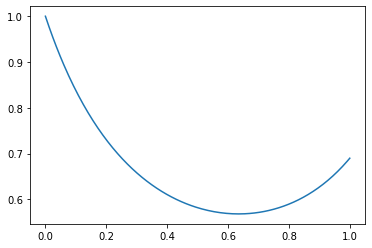

In [11]:
t = np.linspace(0, 1, 250, endpoint=True)
plt.plot(t,1/(np.cos(t) + np.sin(2*t)))   #graficar w(x) en el intervalo [0,1].

d)

In [12]:
integrate(sin(x)*cos(x),x) #primitiva de g(x)=y(x)*z(x)=sin(x)*cos(x)

sin(x)**2/2

In [13]:
integrate(sin(x)*cos(x),(x,0,1)) # integral definida de g(x)=y(x)*z(x)=sin(x)*cos(x) de 0 a 1

sin(1)**2/2

e)

In [14]:
limit(sin(x),x,0) # limite de y(x) cuando x tiende a 0

0

In [15]:
limit(cos(x), x, 0) # limite de z(x) cuando x tiende a 0

1

In [16]:
limit(1/(cos(x)+sin(2*x)),x,0) # limite de w(x) cuando x tiende a 0

1

In [17]:
limit(sin(x)*cos(x),x,0) # limite de g(x) cuando x tiende a 0

0

f)

In [18]:
sin(x).series(x,0) #expansión de taylor de 3er orden para y(x)=sin(x)

x - x**3/6 + x**5/120 + O(x**6)

In [19]:
cos(x).series(x,0) #expansión de taylor de 3er orden para z(x)=cos(x)

1 - x**2/2 + x**4/24 + O(x**6)


El atractor de Rössler esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$$$
\frac{dy}{dt} = x + ay
$$$$
\frac{dz}{dt} = b + z(x-c)
$$
(a) Resuelva las ecuaciones numéricamente para

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$
y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$
use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el atractor de Rössler en 3D (i.e. en el espacio).

a)

In [20]:
def atractor(estado, sistema):  #definimos el ssitema de ecuaciones
    X0 = -estado[1] -estado[2]
    X1 = estado[0] + .13*estado[1]
    X2 = .2 + estado[2]*(estado[0]-6.5)
    return np.array([X0,X1,X2])

In [21]:
def RK2(X, t, dt, derivadas):
    k0=dt*derivadas(X,t)
    k1=dt*derivadas(X+k0,t+dt)
    X_next=X+0.5*(k0+k1)
    
    return X_next

In [22]:
N = 1000 # número de pasos

#condiciones iniciales
x0 = 0.0  
y0 = 0.0  
z0= 0.0 
###

tau = 3.0 # tiempo de la simulación
 
dt = tau/(float)(N-1)  # tamaño del paso

In [23]:
time = np.linspace(0, tau, N)

In [24]:
X = np.zeros([N,3])

X[0,0] = x0
X[0,1] = y0
X[0,2] = z0

In [25]:
for j in range(N-1):
    X[j+1] = RK2(X[j], time[j], dt, atractor)

b)

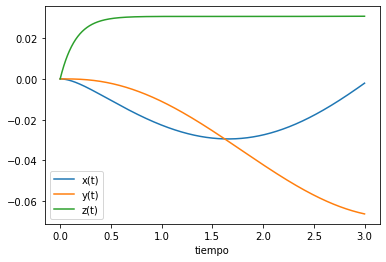

In [26]:
xdata = [X[j,0] for j in range(N)]
ydata = [X[j,1] for j in range(N)]
zdata = [X[j,2] for j in range(N)]
plt.plot(time, xdata,label='x(t)')
plt.plot(time, ydata, label="y(t)")
plt.plot(time, zdata, label="z(t)")
plt.xlabel("tiempo")
plt.legend(loc="best")

c)

In [46]:
from mpl_toolkits.mplot3d import Axes3D

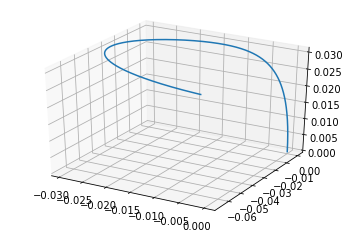

In [30]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot(xdata, ydata, zdata)